In [1]:
# Skin Cancer Inference Notebook using Trained PyTorch Model

import os
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torchvision.models import resnet18, ResNet18_Weights
from PIL import Image
import numpy as np

In [2]:
# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [3]:
# Load Class Names (should match your training classes)
class_names = ['benign', 'malignant']  # Replace with actual class names if different

In [4]:
# Load weights
weights = ResNet18_Weights.DEFAULT
model = resnet18(weights=weights)

# Replace classifier
num_ftrs = model.fc.in_features
model.fc = torch.nn.Sequential(
    torch.nn.Linear(num_ftrs, 128),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.4),
    torch.nn.Linear(128, len(class_names)),
)

# Load trained model weights
model.load_state_dict(torch.load("model.pth", map_location=device))  # Make sure "model.pth" is saved earlier
model = model.to(device)
model.eval()


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [5]:
# Preprocessing Pipeline
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])


In [6]:
# Prediction Function

def predict_image(image_path):
    image = Image.open(image_path).convert("RGB")
    input_tensor = transform(image).unsqueeze(0).to(device)
    
    with torch.no_grad():
        outputs = model(input_tensor)
        _, predicted = torch.max(outputs, 1)
        class_idx = predicted.item()

    plt.imshow(np.array(image))
    plt.title(f"Predicted: {class_names[class_idx]}")
    plt.axis("off")
    plt.show()

    return class_names[class_idx]


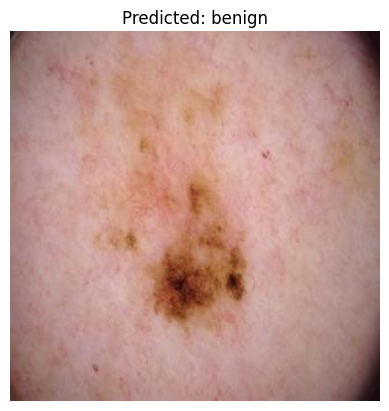

Prediction: benign


In [8]:
# Use It!

# Example image path (replace with your own)
image_path = "test.jpg"
prediction = predict_image(image_path)
print(f"Prediction: {prediction}")
